In [118]:
import Dominion
from numpy import math
from math import factorial
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from itertools import permutations
from collections import defaultdict

In [119]:
names=['Adam','Bonnie','Chelsea']
players=['*'+name for name in names]
#Note: Asterisks are needed for input into the Dominion playgame function. The output does not include the asterisk.

### Each player vs. Adam


In [120]:
Wins = defaultdict(int)
ngames=10000
for i in range(ngames//72):
    for player in players:
        for nplayers in range(2,5):#3 different player quantities
            these_players=[player]+['*Adam' + str(i) for i in range(1,nplayers)]
            #Each possible permutation of player with 1-3 opponents is played a certain number of times;
            #that number is adjusted to create equal numbers of 2,3, and 4 player games
            games=list(permutations(these_players))*(24//factorial(nplayers))
            for game in games:
                winners=Dominion.playgame(game,True)[0]
                for winner in winners:
                    Wins[winner]+=1
            

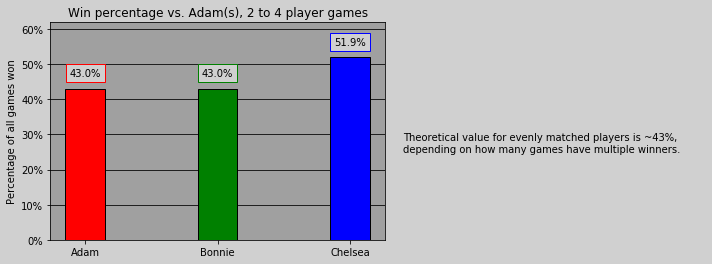

In [221]:
colors=['r','g','b']
fig1,ax1=plt.subplots()
fig1.patch.set_facecolor('#D0D0D0')
win_percentages=[Wins[name]/(72*ngames//72) for name in names]
maxwins=max(win_percentages)+0.1
b=ax1.bar(names,win_percentages,0.3,zorder=3,color=colors,edgecolor='black')
ax1.set_ylabel('Percentage of all games won')
ax1.text(2.4,0.25,'Theoretical value for evenly matched players is ~43%,\
         \ndepending on how many games have multiple winners.')
ax1.set_facecolor('#A0A0A0')
plt.ylim(0,maxwins)
plt.grid(True,which='both',axis='y',zorder=1,color='black')
plt.title('Win percentage vs. Adam(s), 2 to 4 player games')

ax1.yaxis.set_major_formatter(tick.PercentFormatter(xmax=1,decimals=0,symbol='%',is_latex=False))
def autolabel(bars):
    #Attach a text label above each bar displaying its height
    boxformat=dict(facecolor='#D0D0D0',edgecolor='#70E070')
    for color,bar in zip(colors,bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., 0.03+height,
                "{:.1%}".format(height),
                ha='center', va='bottom',bbox=dict(facecolor='#D0D0D0',edgecolor=color))

autolabel(b)
plt.show()

### Win share against each other

In [190]:
Wins = defaultdict(int)
ngames=10000
games2p=list(permutations(players,2))*12
games3p=list(permutations(players,3))*4
games4p=list(permutations(players,4))
games=games2p+games3p+games4p
games=games*(ngames//72)

for game in games:
    winners=Dominion.playgame(game,True)[0]
    for winner in winners:
        Wins[winner]+=1

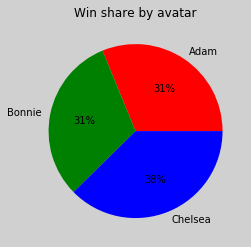

In [222]:
#Pie chart showing win share by player. Note that one game can have more than one winner.
#So the chart shows share of wins by player, not the % of games won by that player.
fig2,ax2=plt.subplots()
fig2.patch.set_facecolor('#D0D0D0')
sizes=[Wins[name] for name in names]
ax2.pie(sizes,labels=names,autopct='%1.0f%%',colors=colors)
plt.title('Win share by avatar')
plt.show()